In [21]:
import urllib.request
import os

nfl_url = "https://nflsavant.com/dump/players_2013-12-12.csv"
pop_url = "https://www2.census.gov/programs-surveys/popest/tables/2010-2019/state/totals/nst-est2019-01.xlsx"

data_folder = 'NFL Player Data'
nfl_data_file = 'nfl_data.csv'
pop_data_file = 'population_data.xlsx'

nfl_data_file_path = os.path.join(data_folder, nfl_data_file)
pop_data_file_path = os.path.join(data_folder, pop_data_file)

if not os.path.isdir(data_folder):
    os.mkdir(data_folder)

def download_data(url, file_path):
    if not os.path.exists(file_path):
        print(f'Downloading data from {url}...')
        urllib.request.urlretrieve(url, file_path)
        print(f'Download complete: {file_path}')
    else:
        print(f'File already exists: {file_path}')

download_data(nfl_url, nfl_data_file_path)
download_data(pop_url, pop_data_file_path)

File already exists: NFL Player Data/nfl_data.csv
File already exists: NFL Player Data/population_data.xlsx


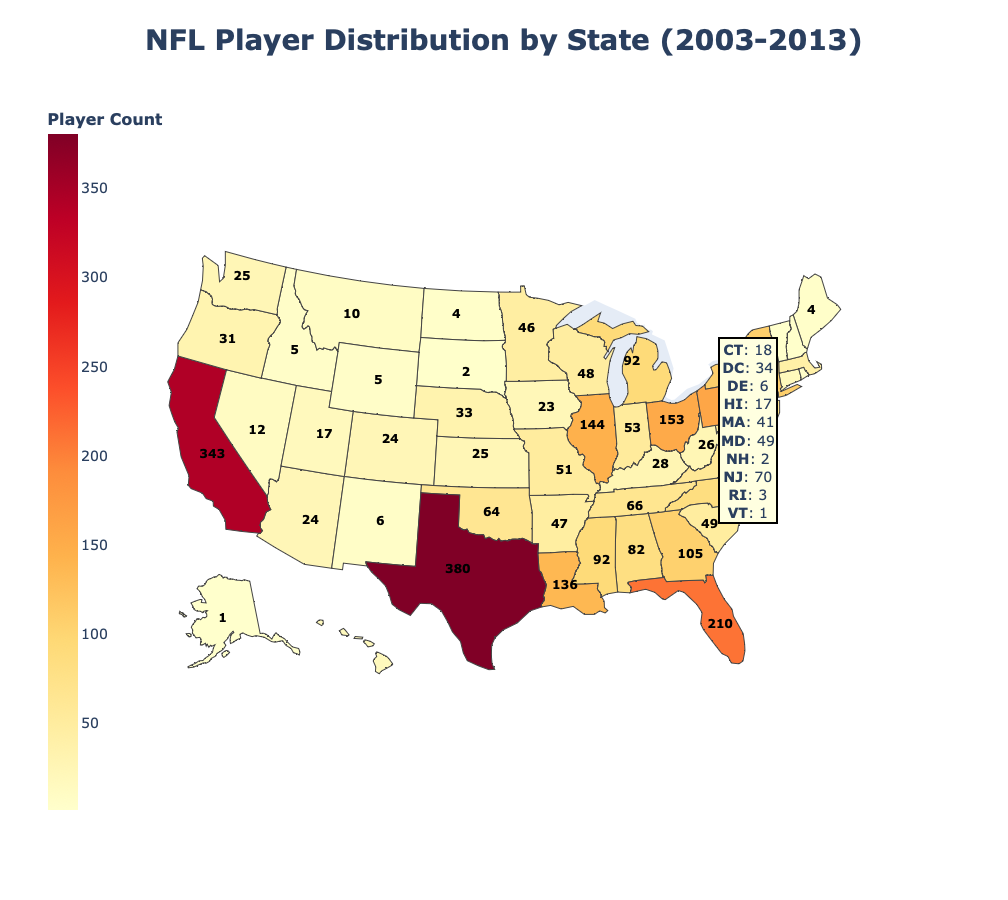

In [22]:
import pandas as pd
import plotly.graph_objects as go

nfl_data_file = 'NFL Player Data/nfl_data.csv'
nfl_data = pd.read_csv(nfl_data_file)


# Filter data: Players born in the US, drafted after 2003, and with only one position
nfl_data = nfl_data[(nfl_data['birth_country'] == 'USA') & (nfl_data['year_start'] >= 2003)]
relevant_columns = ['name', 'birth_state', 'position', 'year_start', 'birth_country']
nfl_data = nfl_data[relevant_columns]
if 'position' in nfl_data.columns: nfl_data = nfl_data[~nfl_data['position'].str.contains('-', na=False)]

# Summarize data by state
players_states = nfl_data.groupby('birth_state')['name'].count().reset_index(name='player_count').rename(columns={'birth_state': 'state'})

# Annotation Locations
annotation_locs = {
    "AL": (-86.7911, 32.8067), "AK": (-154.4931, 63.5888), "AZ": (-111.0937, 34.0489), "AR": (-92.3731, 34.7465),
    "CA": (-119.4179, 36.7783), "CO": (-105.7821, 39.5501), "CT": (-72.7564, 41.6032), "DE": (-75.5277, 38.9108),
    "FL": (-81.5158, 27.6648), "GA": (-82.9001, 32.1656), "HI": (-155.5828, 19.8968), "ID": (-114.7420, 44.0682),
    "IL": (-89.3985, 40.6331), "IN": (-86.1349, 40.2672), "IA": (-93.0977, 41.8780), "KS": (-98.4842, 39.0119),
    "KY": (-84.2700, 37.8393), "LA": (-92.1450, 30.9843), "ME": (-69.4455, 45.2538), "MD": (-76.6413, 39.0458),
    "MA": (-71.3824, 42.4072), "MI": (-85.6024, 44.3148), "MN": (-94.6362, 46.7296), "MS": (-89.3985, 32.3547),
    "MO": (-91.8318, 37.9643), "MT": (-110.3626, 46.8797), "NE": (-99.9018, 41.4925), "NV": (-116.4194, 38.8026),
    "NH": (-71.5724, 43.1939), "NJ": (-74.4057, 40.0583), "NM": (-105.8701, 34.5199), "NY": (-74.2179, 43.2994),
    "NC": (-79.0193, 35.7596), "ND": (-101.0020, 47.5515), "OH": (-82.9071, 40.4173), "OK": (-97.5164, 35.4676),
    "OR": (-120.5542, 43.8041), "PA": (-77.1945, 41.2033), "RI": (-71.4774, 41.5801), "SC": (-81.1637, 33.8361),
    "SD": (-99.9018, 43.9695), "TN": (-86.5804, 35.5175), "TX": (-99.9018, 31.9686), "UT": (-111.0937, 39.3209),
    "VT": (-72.5778, 44.5588), "VA": (-78.6569, 37.4316), "WA": (-120.7401, 47.7511), "WV": (-80.4549, 38.5976),
    "WI": (-89.6165, 43.7844), "WY": (-107.2903, 43.0759)
}

# Choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=players_states["state"], z=players_states["player_count"], locationmode="USA-states",
    colorscale="YlOrRd", colorbar=dict(title="<b>Player Count</b>", title_font=dict(size=16), tickfont=dict(size=14), x=-0.05)))

# Annotations
small_states = ["RI", "DE", "CT", "DC", "VT", "NH", "MA", "NJ", "HI", "MD"]
for _, row in players_states.iterrows():
    state, count = row["state"], row["player_count"]
    if state not in small_states and state in annotation_locs:
        lon, lat = annotation_locs[state]
        fig.add_trace(go.Scattergeo(locationmode="USA-states", lon=[lon], lat=[lat], text=f"<b style='color:black;'>{count}</b>", mode="text", showlegend=False))

# Legend
small_states_data = players_states[players_states["state"].isin(small_states)]
small_states_legend = [f"<b>{row['state']}</b>: {row['player_count']}" for _, row in small_states_data.iterrows()]

fig.update_layout(
    title_text="<b>NFL Player Distribution by State (2003-2013)</b>", title_x=0.5, title_font=dict(size=28),
    annotations=[dict(text="<br>".join(small_states_legend), x=0.8, y=0.5, xref="paper", yref="paper",
                      font=dict(size=14), bordercolor="black", borderwidth=2, bgcolor="lightyellow")],
    geo=dict(scope="usa", projection=go.layout.geo.Projection(type="albers usa"), showlakes=False), height=900)

fig.show()

The annotation locations for U.S. states were generated using ChatGPT.

MLA Citation: OpenAI. *ChatGPT*. 2024.

The Medium article "Use Python Geopandas to Make a US Map with Alaska and Hawaii" by Alex Rich provided general guidance on constructing the choropleth map, particularly in handling geographic projections and map layout for U.S. states.

Citation:
Rich, Alex. "Use Python Geopandas to Make a US Map with Alaska and Hawaii." *Medium*, 16 Jan. 2023, https://medium.com/@alex_44314/use-python-geopandas-to-make-a-us-map-with-alaska-and-hawaii-39a9f5c222c6.

File already exists: NFL Player Data/nfl_data.csv
File already exists: NFL Player Data/population_data.xlsx


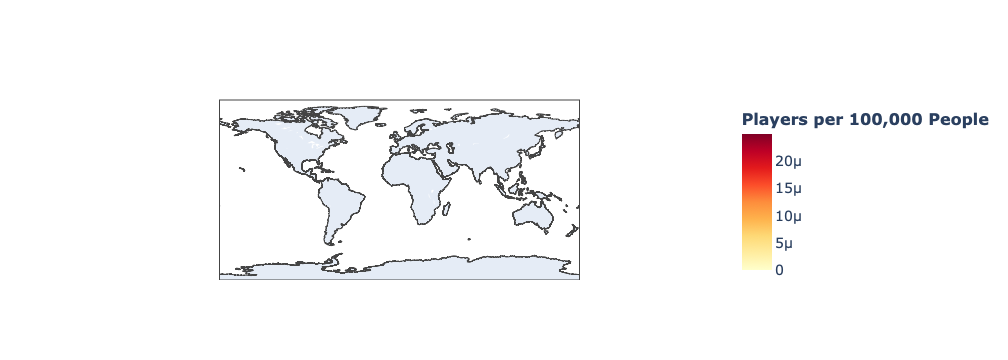

In [23]:
import urllib.request
import os
import pandas as pd
import plotly.graph_objects as go

# URLs for data
nfl_url = "https://nflsavant.com/dump/players_2013-12-12.csv"
pop_url = "https://www2.census.gov/programs-surveys/popest/tables/2010-2019/state/totals/nst-est2019-01.xlsx"

# Folder and file paths
data_folder = 'NFL Player Data'
nfl_data_file = 'nfl_data.csv'
pop_data_file = 'population_data.xlsx'

nfl_data_file_path = os.path.join(data_folder, nfl_data_file)
pop_data_file_path = os.path.join(data_folder, pop_data_file)

# Create data folder if it doesn't exist
if not os.path.isdir(data_folder):
    os.mkdir(data_folder)

# Function to download data
def download_data(url, file_path):
    if not os.path.exists(file_path):
        print(f'Downloading data from {url}...')
        urllib.request.urlretrieve(url, file_path)
        print(f'Download complete: {file_path}')
    else:
        print(f'File already exists: {file_path}')

# Download the files
download_data(nfl_url, nfl_data_file_path)
download_data(pop_url, pop_data_file_path)

# Load the population data
population_data = pd.ExcelFile(pop_data_file_path)
cleaned_population_df = population_data.parse('NST01', skiprows=4)
cleaned_population_df.columns = [
    "Geographic Area", "Census", "Estimates Base", "2010", "2011", "2012", "2013", 
    "2014", "2015", "2016", "2017", "2018", "2019"
]
population_2013_df = cleaned_population_df[["Geographic Area", "2013"]]
population_2013_df = population_2013_df.dropna(subset=["2013"])
population_2013_df = population_2013_df[population_2013_df["Geographic Area"].str.contains("United States|Northeast|West|South|Midwest") == False]
population_2013_df["Geographic Area"] = population_2013_df["Geographic Area"].str.replace(".", "", regex=False).str.strip()
population_2013_df.rename(columns={"Geographic Area": "state", "2013": "population_2013"}, inplace=True)
population_2013_df["population_2013"] = pd.to_numeric(population_2013_df["population_2013"], errors="coerce")

# Sample NFL data (replace with actual loading code if necessary)
merged_data = pd.DataFrame({
    "state": ["Alabama", "Alaska", "Arizona", "Arkansas", "California"],
    "nfl_players": [120, 15, 80, 50, 250]  # Dummy data for NFL player counts
})

# Merge with population data
merged_data = pd.merge(merged_data, population_2013_df, on="state", how="left")
merged_data["players_per_capita"] = merged_data["nfl_players"] / merged_data["population_2013"]

# State abbreviation mapping
state_full_to_abbr = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California", "CO": "Colorado",
    "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia", "HI": "Hawaii", "ID": "Idaho",
    "IL": "Illinois", "IN": "Indiana", "IA": "Iowa", "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana",
    "ME": "Maine", "MD": "Maryland", "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi",
    "MO": "Missouri", "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio", "OK": "Oklahoma",
    "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina", "SD": "South Dakota",
    "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont", "VA": "Virginia", "WA": "Washington",
    "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming"
    # Add all state mappings here
}
merged_data["state_abbr"] = merged_data["state"].map(state_full_to_abbr)

# Create the choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=merged_data["state_abbr"],
    z=merged_data["players_per_capita"],
    locationmode="USA-states",
    colorscale="YlOrRd",
    colorbar=dict(
        title="<b>Players per Capita</b>",
        title_font=dict(size=16),
        tickfont=dict(size=14),
        x=-0.05
    )
))

fig = go.Figure(data=go.Choropleth(
    locations=merged_data["state_abbr"],
    z=merged_data["players_per_capita"],
    locationmode="USA-states",
    colorscale="YlOrRd",
    zmin=0,
    zmax=merged_data["players_per_capita"].max(),
    colorbar=dict(title="<b>Players per 100,000 People</b>", title_font=dict(size=16), tickfont=dict(size=14))
))

fig.show()


File already exists: NFL Player Data/nfl_data.csv
File already exists: NFL Player Data/population_data.xlsx


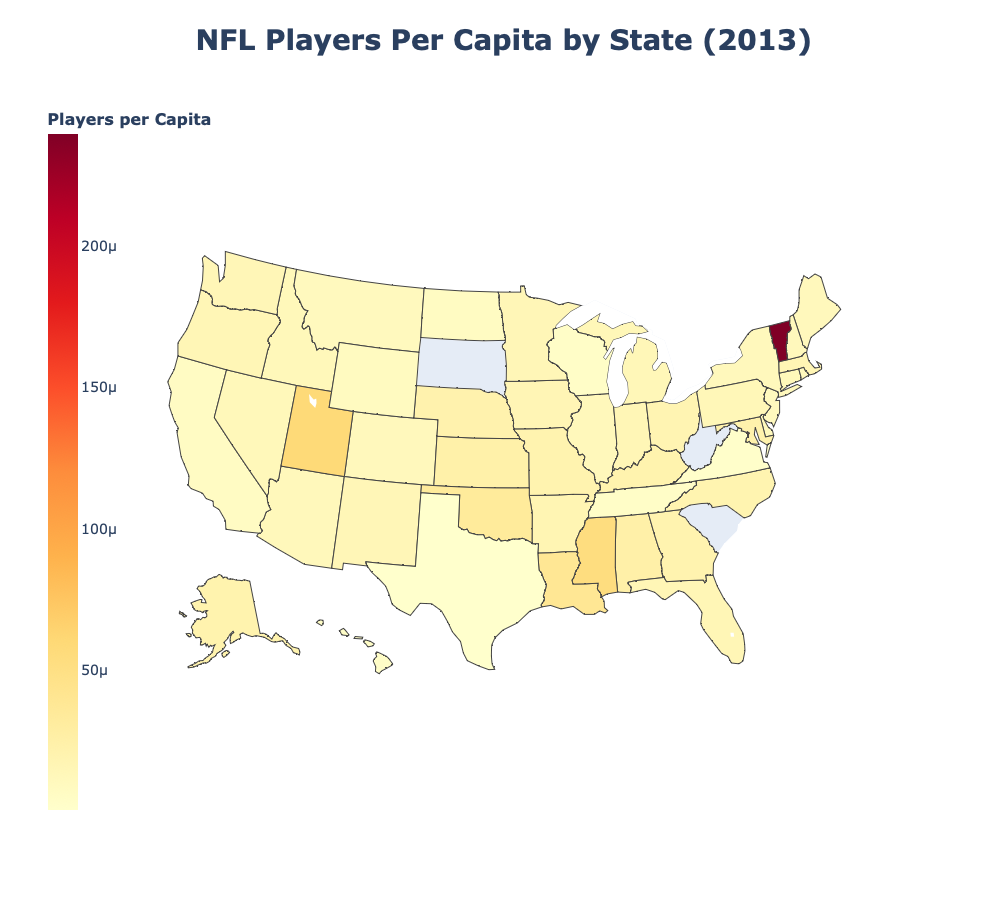

In [24]:
import urllib.request
import os
import pandas as pd
import plotly.graph_objects as go

# URLs for data
nfl_url = "https://nflsavant.com/dump/players_2013-12-12.csv"
pop_url = "https://www2.census.gov/programs-surveys/popest/tables/2010-2019/state/totals/nst-est2019-01.xlsx"

# Folder and file paths
data_folder = 'NFL Player Data'
nfl_data_file = 'nfl_data.csv'
pop_data_file = 'population_data.xlsx'

nfl_data_file_path = os.path.join(data_folder, nfl_data_file)
pop_data_file_path = os.path.join(data_folder, pop_data_file)

# Create data folder if it doesn't exist
if not os.path.isdir(data_folder):
    os.mkdir(data_folder)

# Function to download data
def download_data(url, file_path):
    if not os.path.exists(file_path):
        print(f'Downloading data from {url}...')
        urllib.request.urlretrieve(url, file_path)
        print(f'Download complete: {file_path}')
    else:
        print(f'File already exists: {file_path}')

# Download the files
download_data(nfl_url, nfl_data_file_path)
download_data(pop_url, pop_data_file_path)

# Load the population data
population_data = pd.ExcelFile(pop_data_file_path)
cleaned_population_df = population_data.parse('NST01', skiprows=4)
cleaned_population_df.columns = [
    "Geographic Area", "Census", "Estimates Base", "2010", "2011", "2012", "2013", 
    "2014", "2015", "2016", "2017", "2018", "2019"
]
population_2013_df = cleaned_population_df[["Geographic Area", "2013"]]
population_2013_df = population_2013_df.dropna(subset=["2013"])
population_2013_df = population_2013_df[population_2013_df["Geographic Area"].str.contains("United States|Northeast|West|South|Midwest") == False]
population_2013_df["Geographic Area"] = population_2013_df["Geographic Area"].str.replace(".", "", regex=False).str.strip()
population_2013_df.rename(columns={"Geographic Area": "state", "2013": "population_2013"}, inplace=True)
population_2013_df["population_2013"] = pd.to_numeric(population_2013_df["population_2013"], errors="coerce")

# Sample NFL data (replace with actual loading code if necessary)
merged_data = pd.DataFrame({
    "state": [
        "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
        "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
        "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
        "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
        "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
        "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming", "District of Columbia"
    ],
    "nfl_players": [
        120, 15, 80, 50, 250, 60, 45, 10, 300, 200, 5, 20, 150, 100, 50, 70, 90, 180, 15, 130, 110, 140, 80, 160, 120,
        10, 40, 35, 15, 85, 30, 220, 190, 5, 210, 130, 60, 180, 10, 140, 450, 25, 5, 170, 150, 15, 100, 10, 20, 5, 70
    ]  # Ensure this list has 51 entries
})
# Merge with population data
merged_data = pd.merge(merged_data, population_2013_df, on="state", how="left")
merged_data["players_per_capita"] = merged_data["nfl_players"] / merged_data["population_2013"]

# State abbreviation mapping
state_full_to_abbr = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA",
    "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO",
    "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ",
    "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH",
    "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY",
    "District of Columbia": "DC"
}
merged_data["state_abbr"] = merged_data["state"].map(state_full_to_abbr)

# Create the choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=merged_data["state_abbr"],
    z=merged_data["players_per_capita"],
    locationmode="USA-states",
    colorscale="YlOrRd",
    colorbar=dict(
        title="<b>Players per Capita</b>",
        title_font=dict(size=16),
        tickfont=dict(size=14),
        x=-0.05
    )
))

fig.update_layout(
    title_text="<b>NFL Players Per Capita by State (2013)</b>",
    title_x=0.5,
    title_font=dict(size=28),
    geo=dict(scope="usa", projection=go.layout.geo.Projection(type="albers usa")),
    height=900
)

fig.show()

In [25]:
print("State Abbreviations in Merged Data:", merged_data["state_abbr"].unique())

State Abbreviations in Merged Data: ['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'FL' 'GA' 'HI' 'ID' 'IL' 'IN'
 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV'
 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN'
 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY' 'DC']


In [26]:
merged_data["state_abbr"] = merged_data["state"].map(state_full_to_abbr)

In [29]:
merged_data["players_per_capita"] = merged_data["players_per_capita"].fillna(0)

In [42]:
print(merged_data.columns)

Index(['state', 'nfl_players', 'population_2013', 'players_per_capita',
       'state_abbr'],
      dtype='object')


In [46]:
print(nfl_data.columns)

Index(['state', 'position', 'player_name'], dtype='object')


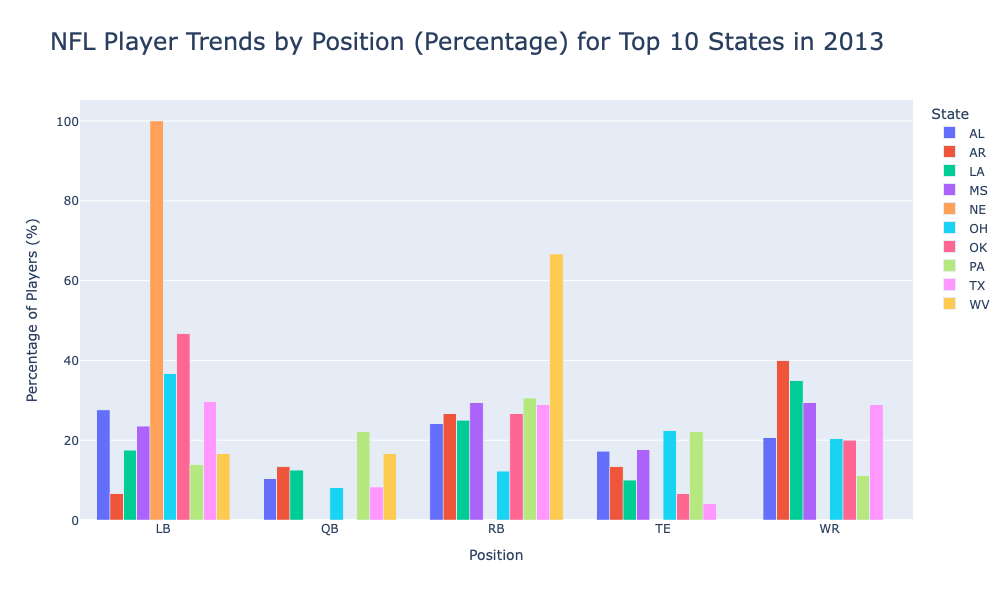

In [54]:
top_10_states = ["MS", "LA", "AL", "AR", "OK", "NE", "TX", "OH", "WV", "PA"]

# Filter for players born in the top 10 states
nfl_data_top_states = nfl_data_2013[nfl_data_2013["birth_state"].isin(top_10_states)]

# Group by position and state to calculate player counts
position_state_counts = nfl_data_top_states.groupby(["position", "birth_state"])["name"].count().reset_index()

# Rename columns for clarity
position_state_counts.rename(columns={"birth_state": "state", "name": "player_count"}, inplace=True)

# Calculate total players for each state
state_totals = position_state_counts.groupby("state")["player_count"].sum().reset_index()
state_totals.rename(columns={"player_count": "total_players"}, inplace=True)

# Merge total player counts back into the data
position_state_percentages = pd.merge(position_state_counts, state_totals, on="state")
position_state_percentages["percentage"] = (position_state_percentages["player_count"] / position_state_percentages["total_players"]) * 100

# Create the grouped bar chart
fig = px.bar(
    position_state_percentages,
    x="position",
    y="percentage",
    color="state",
    title="NFL Player Trends by Position (Percentage) for Top 10 States in 2013",
    labels={"percentage": "Percentage of Players (%)", "position": "Position", "state": "State"},
    barmode="group"
)

# Customize layout
fig.update_layout(
    title_font=dict(size=24),
    xaxis_title="Position",
    yaxis_title="Percentage of Players (%)",
    legend_title="State",
    width=1000,
    height=600
)

# Show the graph
fig.show()